<a href="https://colab.research.google.com/github/manasviKnarula/104-project/blob/main/Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
data_to_load = files.upload()

Saving escape_velocity.csv to escape_velocity.csv


In [2]:
import pandas as pd
import plotly.express as px

df = pd.read_csv("escape_velocity.csv")

velocity = df["Velocity"].tolist()
escaped = df["Escaped"].tolist()

fig = px.scatter(x=velocity, y=escaped)
fig.show()

In [3]:
import numpy as np

velocity_array = np.array(velocity)
escaped_array = np.array(escaped)

m,c = np.polyfit(velocity_array,escaped_array,1)
y = []

for x in velocity_array:
  y_value = m*x+c
  y.append(y_value)

fig = px.scatter(x = velocity_array,y = escaped_array)
fig.update_layout(shapes = [dict(
    type="line",
    y0=min(y),
    y1=max(y),
    x0=min(velocity_array),
    x1=max(velocity_array)
)])
fig.show()


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



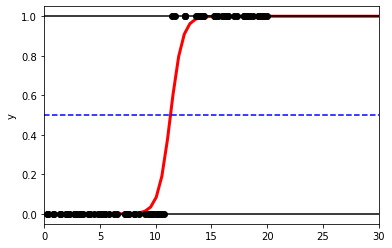

In [5]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import numpy as np

X = np.reshape(velocity,(len(velocity),1))
Y = np.reshape(escaped,(len(escaped),1))

lr = LogisticRegression()
lr.fit(X,Y)
plt.figure()
plt.scatter(X.ravel(),Y,color="black",zorder=20)

def model(x):
  return 1/(1+np.exp(-x))

X_test = np.linspace(0,100,200)
chances = model(X_test*lr.coef_+lr.intercept_).ravel()
plt.plot(X_test,chances,color="red",linewidth=3)
plt.axhline(y=0,color="k",linestyle="-")
plt.axhline(y=1,color="k",linestyle="-")
plt.axhline(y=0.5,color="b",linestyle="--")

plt.axvline(x=X_test[165],color="b",linestyle="--")

plt.ylabel("y")
plt.xlabel=("X")
plt.xlim(0,30)
plt.show()

In [6]:
velocity=float(input("enter you marks here: "))
escape=model(velocity*lr.coef_+lr.intercept_).ravel()[0]
if escape <=0.01:
  print("The student will not get accepted :(")
elif escape >=1:
   print("The student will get accepted :)")
elif escape<0.5:
  print("The studen might not get accepted :/")
else:
  print ("The student may get accepted :/")

enter you marks here: 52
The student will get accepted :)
